In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Data_subset.csv')

In [6]:
df.shape

(500000, 46)

In [7]:
df.describe(include='all')

,Account_ID,Entity_ID,Seller_Type,Creditor_Name,Closure_Type,Entity_City,Entity_State,Entity_Zip,Median_Household_Income,Total_Paid,...,Education_college,Education_highschool,income_score,age_score,unemply_score,college_score,highsch_score,labor_score,total_score,Grade
count,5.000000e+05,5.000000e+05,500000,494862,500000,499581,499151,4.987930e+05,500000.000000,29796.000000,...,500000,500000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000
unique,NaN,NaN,2,1056,21,11846,57,NaN,NaN,NaN,...,15,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
top,NaN,NaN,HOSPITAL,Florida Hospital,UNPAID,HOUSTON,FL,NaN,NaN,NaN,...,15-20%,30-35%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aaa
freq,NaN,NaN,404209,27175,468375,15841,92456,NaN,NaN,NaN,...,109626,131727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89373
mean,1.707548e+07,1.522760e+07,NaN,NaN,NaN,NaN,NaN,5.598092e+04,52628.482002,249.351770,...,NaN,NaN,3.260930,0.911558,2.999405,1.814616,0.397858,2.272804,11.657171,NaN
std,4.013866e+06,5.537419e+06,NaN,NaN,NaN,NaN,NaN,1.649662e+06,13792.053438,502.046151,...,NaN,NaN,0.772213,0.887135,3.140624,2.068814,0.624829,2.639117,4.531894,NaN
min,1.027149e+07,8.500000e+01,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2499.000000,0.040000,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.369816e+07,1.196661e+07,NaN,NaN,NaN,NaN,NaN,3.316800e+04,44375.000000,54.497500,...,NaN,NaN,3.150000,0.350000,0.440000,0.000000,0.000000,0.000000,8.360000,NaN
50%,1.693411e+07,1.546290e+07,NaN,NaN,NaN,NaN,NaN,4.410200e+04,52633.424242,112.500000,...,NaN,NaN,3.150000,0.410000,1.260000,1.860000,0.000000,0.560000,11.360000,NaN
75%,2.057761e+07,1.928964e+07,NaN,NaN,NaN,NaN,NaN,7.601000e+04,57011.000000,270.000000,...,NaN,NaN,4.020000,2.070000,4.870000,3.060000,0.920000,5.980000,14.650000,NaN


In [8]:
df.columns

Index(['Account_ID', 'Entity_ID', 'Seller_Type', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age', 'Target', 'Income_level',
       'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age', 'Paid',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool',
       'income_score', 'age_score', 'unemply_score', 'college_score',
       'highsch_score', 'labor_score', 'total_score', 'Grade'],
      dtype='object')

# Modeling with original dataset (distribution)

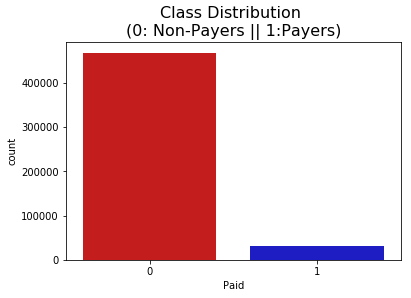

In [177]:
colors = ["#DF0101", "#0101DF"]

sns.countplot('Paid', data=df, palette=colors)
plt.title('Class Distribution \n(0: Non-Payers || 1:Payers)',fontsize=16);

In [10]:
drop_columns = ['Account_ID', 'Entity_ID',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
         'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80','Target','Creditor_Name', 'income_score', 'age_score', 
        'unemply_score', 'college_score',
       'highsch_score', 'labor_score', 'total_score',]

In [11]:
model_data = df.drop(drop_columns, axis=1)

In [12]:
model_data.columns

Index(['Seller_Type', 'Median_Household_Income', 'Invoice_bal', 'Age',
       'Income_level', 'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age',
       'Paid', 'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool',
       'Grade'],
      dtype='object')

In [13]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
Seller_Type                   500000 non-null object
Median_Household_Income       500000 non-null float64
Invoice_bal                   500000 non-null float64
Age                           500000 non-null float64
Income_level                  500000 non-null object
Age_MedIncome                 500000 non-null float64
Invbal_MedIncome              500000 non-null float64
Invbal_Age                    500000 non-null float64
Paid                          500000 non-null int64
unemployment_rate             487517 non-null float64
labor_force_participation     487753 non-null float64
education_highschool          487730 non-null float64
education_college_or_above    487730 non-null float64
home_value                    481473 non-null float64
rent_burden                   477350 non-null float64
Age_range                     500000 non-null object
Unemply_rate_range            

Dropping necessary columns below.

In [64]:
model_data.columns

Index(['Seller_Type', 'Median_Household_Income', 'Invoice_bal', 'Age',
       'Income_level', 'Age_MedIncome', 'Invbal_MedIncome', 'Invbal_Age',
       'Paid', 'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool',
       'Grade'],
      dtype='object')

In [66]:
target = pd.DataFrame(df.Paid)

In [15]:
#selecting data types "object" in order to one hot encode
categorical = model_data.loc[:, model_data.dtypes == np.object]

#converting data types to "category"
for col in categorical.columns: 
    categorical[col] = categorical[col].astype('category')

In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#RobustScaler is less prone to outliers 

std_scl = StandardScaler()
rob_scl = RobustScaler()

In [18]:
one_hot_cat = pd.get_dummies(categorical)

In [67]:
#selecting data types "float"
numerical = model_data.loc[:, model_data.dtypes == np.float64]

In [68]:
numerical['scl_Median_Household_Income'] = rob_scl.fit_transform(numerical.Median_Household_Income.values.reshape(-1,1))
numerical['scl_Invoice_bal'] = rob_scl.fit_transform(numerical.Invoice_bal.values.reshape(-1,1))
numerical['scl_Age'] = rob_scl.fit_transform(numerical.Age.values.reshape(-1,1))
numerical['scl_Age_MedIncome'] = rob_scl.fit_transform(numerical.Age_MedIncome.values.reshape(-1,1))
numerical['scl_Unemployment_rate'] = rob_scl.fit_transform(numerical.unemployment_rate.values.reshape(-1,1))
numerical['scl_Labor_force_participation'] = rob_scl.fit_transform(numerical.labor_force_participation.values.reshape(-1,1))
numerical['scl_Education_Highschool'] = rob_scl.fit_transform(numerical.education_highschool.values.reshape(-1,1))
numerical['scl_Education_College'] = rob_scl.fit_transform(numerical.education_college_or_above.values.reshape(-1,1))
numerical['scl_Home_value'] = rob_scl.fit_transform(numerical.home_value.values.reshape(-1,1))
numerical['scl_Rent_burden'] = rob_scl.fit_transform(numerical.rent_burden.values.reshape(-1,1))

In [69]:
num_drop = ['Median_Household_Income', 'Invoice_bal', 'Age', 'Age_MedIncome',
       'Invbal_MedIncome', 'Invbal_Age', 'unemployment_rate',
       'labor_force_participation', 'education_highschool',
       'education_college_or_above', 'home_value', 'rent_burden']

scaled_num = numerical.drop(num_drop, axis=1)
scaled_num.columns

Index(['scl_Median_Household_Income', 'scl_Invoice_bal', 'scl_Age',
       'scl_Age_MedIncome', 'scl_Unemployment_rate',
       'scl_Labor_force_participation', 'scl_Education_Highschool',
       'scl_Education_College', 'scl_Home_value', 'scl_Rent_burden'],
      dtype='object')

In [70]:
#combining numerical and categorical features into one dataset to scale
predictors = pd.concat([scaled_num, one_hot_cat], axis=1, join_axes=[numerical.index])
#filling NaNs with 0s
predictors.fillna(0, inplace=True)

In [72]:
#combining numerical and categorical features into one dataset to scale
new_df = pd.concat([predictors, df.Paid], axis=1, join_axes=[predictors.index])

new_df.head()

,scl_Median_Household_Income,scl_Invoice_bal,scl_Age,scl_Age_MedIncome,scl_Unemployment_rate,scl_Labor_force_participation,scl_Education_Highschool,scl_Education_College,scl_Home_value,scl_Rent_burden,...,Grade_Aaa,Grade_B,Grade_Bb,Grade_Bbb,Grade_C,Grade_Cc,Grade_D,Grade_Dd,Grade_F,Paid
0,-1.973918,0.556559,0.952381,-0.367665,-0.808511,1.224299,-0.180952,-0.012903,1.258931,0.074468,...,1,0,0,0,0,0,0,0,0,0
1,-1.111873,-0.339358,0.040698,-0.366144,-0.787234,-0.616822,1.180952,-0.245161,-0.523829,0.925532,...,1,0,0,0,0,0,0,0,0,0
2,0.057359,4.215060,-0.333333,-0.137117,-0.744681,0.252336,-0.095238,0.154839,-0.087992,0.521277,...,0,0,0,0,0,0,0,0,0,0
3,3.579600,-0.264836,-0.666667,0.725251,-0.276596,1.205607,-0.571429,0.380645,0.119025,-0.351064,...,0,0,0,0,1,0,0,0,0,0
4,0.000705,0.563050,1.047619,0.995784,-0.744681,0.504673,-0.380952,1.051613,0.745604,-0.829787,...,1,0,0,0,0,0,0,0,0,0


In [73]:
new_df.shape

(500000, 104)

# Splitting the Data (Original DataFrame) 

Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. **Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.** The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('Non-Payers', round(new_df['Paid'].value_counts()[0]/len(new_df) * 100,2), '% of the dataset')
print('Payers', round(new_df['Paid'].value_counts()[1]/len(new_df) * 100,2), '% of the dataset')

X = new_df.drop('Paid', axis=1)
y = new_df['Paid']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Non-Payers 93.68 % of the dataset
Payers 6.32 % of the dataset
Train: [ 99807  99809  99813 ... 499997 499998 499999] Test: [     0      1      2 ... 100013 100014 100015]
Train: [     0      1      2 ... 499997 499998 499999] Test: [ 99807  99809  99813 ... 200056 200057 200058]
Train: [     0      1      2 ... 499997 499998 499999] Test: [199320 199331 199343 ... 300029 300030 300031]
Train: [     0      1      2 ... 499997 499998 499999] Test: [299577 299584 299596 ... 400679 400699 400723]
Train: [     0      1      2 ... 400679 400699 400723] Test: [399969 399970 399971 ... 499997 499998 499999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.93675 0.06325]
[0.93675 0.06325]


# Random Under-sampling: 



In [75]:
new_df = new_df.sample(frac=1)

payers = new_df.loc[new_df.Paid ==1]
nonpayers = new_df.loc[new_df.Paid == 0] 

norm_dist_df = pd.concat([payers, nonpayers])

data = norm_dist_df.sample(frac=1, random_state=42)

data.head()

,scl_Median_Household_Income,scl_Invoice_bal,scl_Age,scl_Age_MedIncome,scl_Unemployment_rate,scl_Labor_force_participation,scl_Education_Highschool,scl_Education_College,scl_Home_value,scl_Rent_burden,...,Grade_Aaa,Grade_B,Grade_Bb,Grade_Bbb,Grade_C,Grade_Cc,Grade_D,Grade_Dd,Grade_F,Paid
438921,-0.417287,0.390604,-0.142857,-0.179837,1.553191,0.009346,0.771429,-0.677419,-0.554704,0.819149,...,1,0,0,0,0,0,0,0,0,0
313237,0.232872,8.304682,-0.666667,-0.362674,0.404255,0.467290,0.219048,0.103226,0.089569,0.489362,...,0,0,1,0,0,0,0,0,0,0
193455,-1.506286,0.056712,0.523810,-0.292446,0.382979,-1.383178,0.257143,-0.058065,-0.406515,0.861702,...,0,0,0,0,0,0,1,0,0,0
311242,1.270206,1.721971,0.619048,1.377695,2.404255,-0.065421,-0.600000,-0.419355,0.799617,-0.287234,...,0,1,0,0,0,0,0,0,0,0
490491,0.461291,-0.014804,-0.809524,-0.421126,-0.553191,0.373832,-0.761905,0.870968,0.358213,-0.574468,...,1,0,0,0,0,0,0,0,0,0


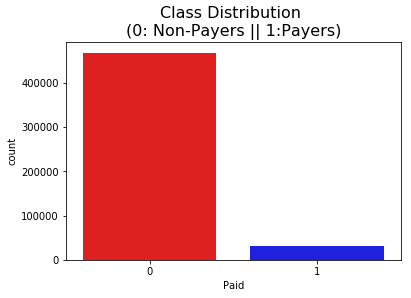

In [77]:
colors = ["red", "blue"]

sns.countplot('Paid', data=data, palette=colors)
plt.title('Class Distribution \n(0: Non-Payers || 1:Payers)',fontsize=16);

### Correlation Matrices 
We want to know if there are any features that influence heavily. 

### Summary and Explanation: 
- 

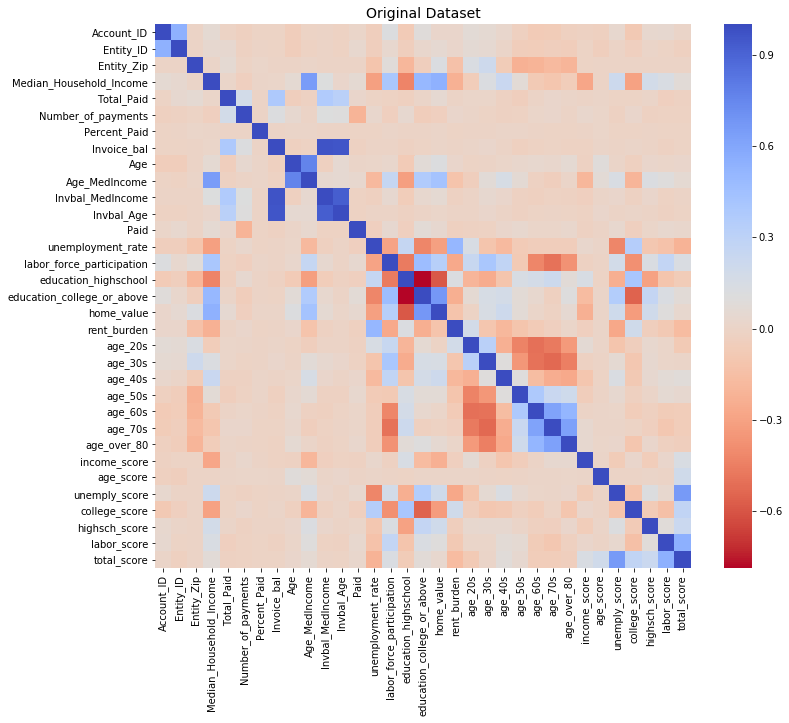

In [176]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,10))

#Entire df 
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax1)
ax1.set_title('Original Dataset', fontsize=14)


plt.savefig('img_heatmap.png')
plt.show()


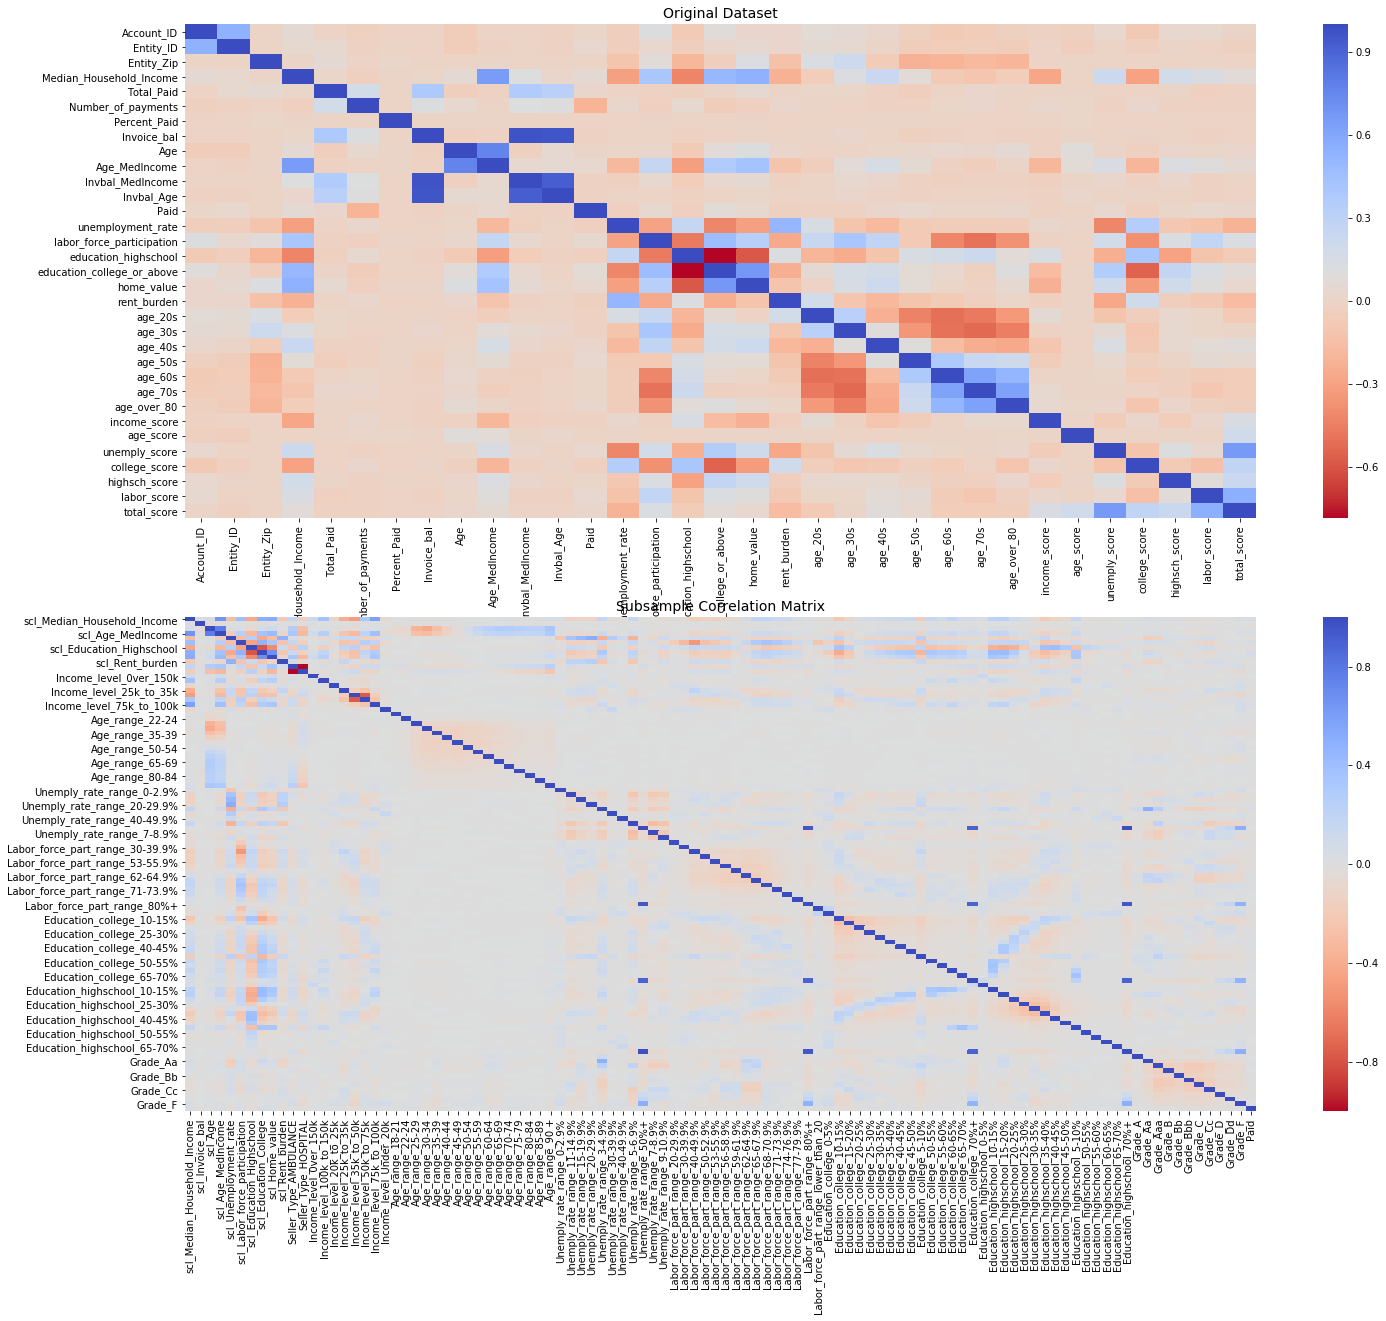

In [175]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

#Entire df 
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax1)
ax1.set_title('Original Dataset', fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax2)
ax2.set_title('Subsample Correlation Matrix', fontsize=14)

plt.show()



In [79]:
data.columns

Index(['scl_Median_Household_Income', 'scl_Invoice_bal', 'scl_Age',
       'scl_Age_MedIncome', 'scl_Unemployment_rate',
       'scl_Labor_force_participation', 'scl_Education_Highschool',
       'scl_Education_College', 'scl_Home_value', 'scl_Rent_burden',
       ...
       'Grade_Aaa', 'Grade_B', 'Grade_Bb', 'Grade_Bbb', 'Grade_C', 'Grade_Cc',
       'Grade_D', 'Grade_Dd', 'Grade_F', 'Paid'],
      dtype='object', length=104)

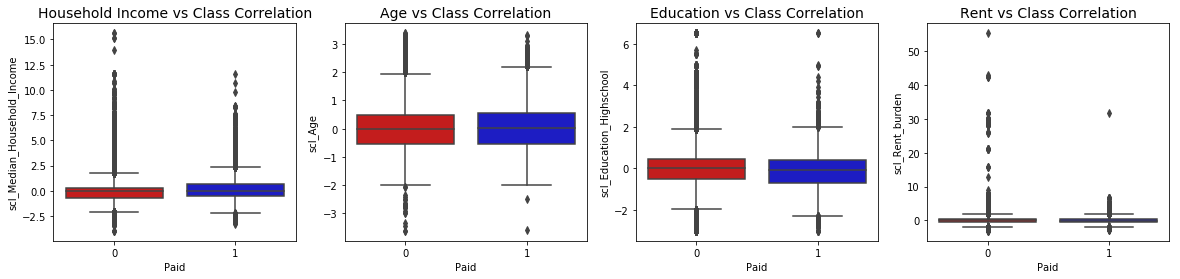

In [218]:
f, axes = plt.subplots( ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a Payer)
sns.boxplot(x="Paid", y="scl_Median_Household_Income", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Household Income vs Class Correlation',fontsize=14)

sns.boxplot(x="Paid", y="scl_Age", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Age vs Class Correlation',fontsize=14)


sns.boxplot(x="Paid", y="scl_Education_Highschool", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Education vs Class Correlation', fontsize=14)


sns.boxplot(x="Paid", y="scl_Rent_burden", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Rent vs Class Correlation',fontsize=14)

plt.savefig('img_boxplot.png')
plt.show()

In [88]:
numerical.columns

Index(['Median_Household_Income', 'Invoice_bal', 'Age', 'Age_MedIncome',
       'Invbal_MedIncome', 'Invbal_Age', 'unemployment_rate',
       'labor_force_participation', 'education_highschool',
       'education_college_or_above', 'home_value', 'rent_burden',
       'scl_Median_Household_Income', 'scl_Invoice_bal', 'scl_Age',
       'scl_Age_MedIncome', 'scl_Unemployment_rate',
       'scl_Labor_force_participation', 'scl_Education_Highschool',
       'scl_Education_College', 'scl_Home_value', 'scl_Rent_burden'],
      dtype='object')

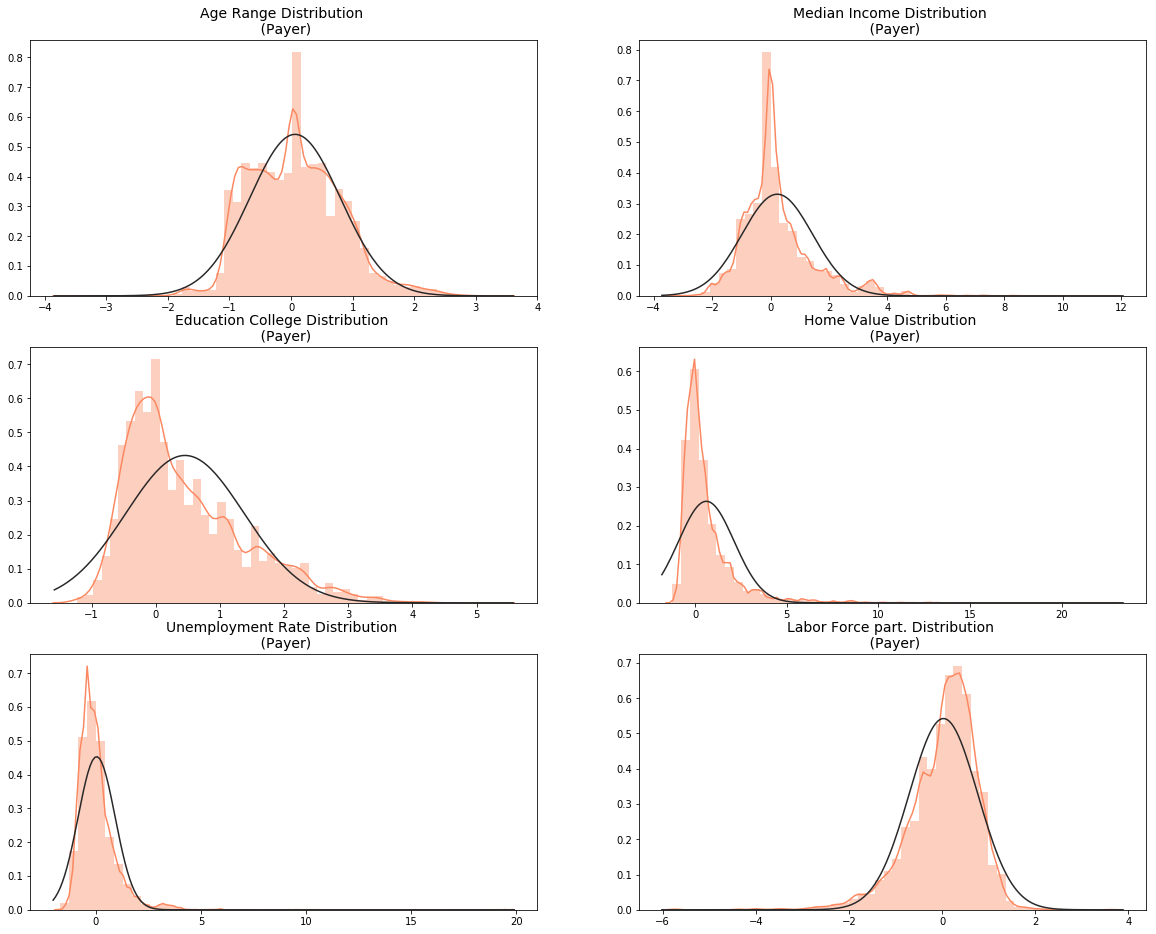

In [110]:
from scipy.stats import norm

f, ( [ax1, ax2], [ax3, ax4] , [ax5, ax6]) = plt.subplots(3, 2 , figsize=(20, 16))

scl_age_payer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_age_payer_dist,ax=ax1, fit=norm, color='#56F9BB')
ax1.set_title('Age Range Distribution \n (Payer)', fontsize=14)

scl_income_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_income_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Median Income Distribution \n (Payer)', fontsize=14)


scl_college_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_college_dist,ax=ax3, fit=norm, color='#FB8861')
ax3.set_title('Education College Distribution \n (Payer)', fontsize=14)

scl_home_dist = new_df['scl_Home_value'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_home_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('Home Value Distribution \n (Payer)', fontsize=14)

scl_unemply_dist = new_df['scl_Unemployment_rate'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_unemply_dist,ax=ax5, fit=norm, color='#FB8861')
ax5.set_title('Unemployment Rate Distribution \n (Payer)', fontsize=14)

scl_labor_dist = new_df['scl_Labor_force_participation'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_labor_dist,ax=ax6, fit=norm, color='#FB8861')
ax6.set_title('Labor Force part. Distribution \n (Payer)', fontsize=14)


plt.show()

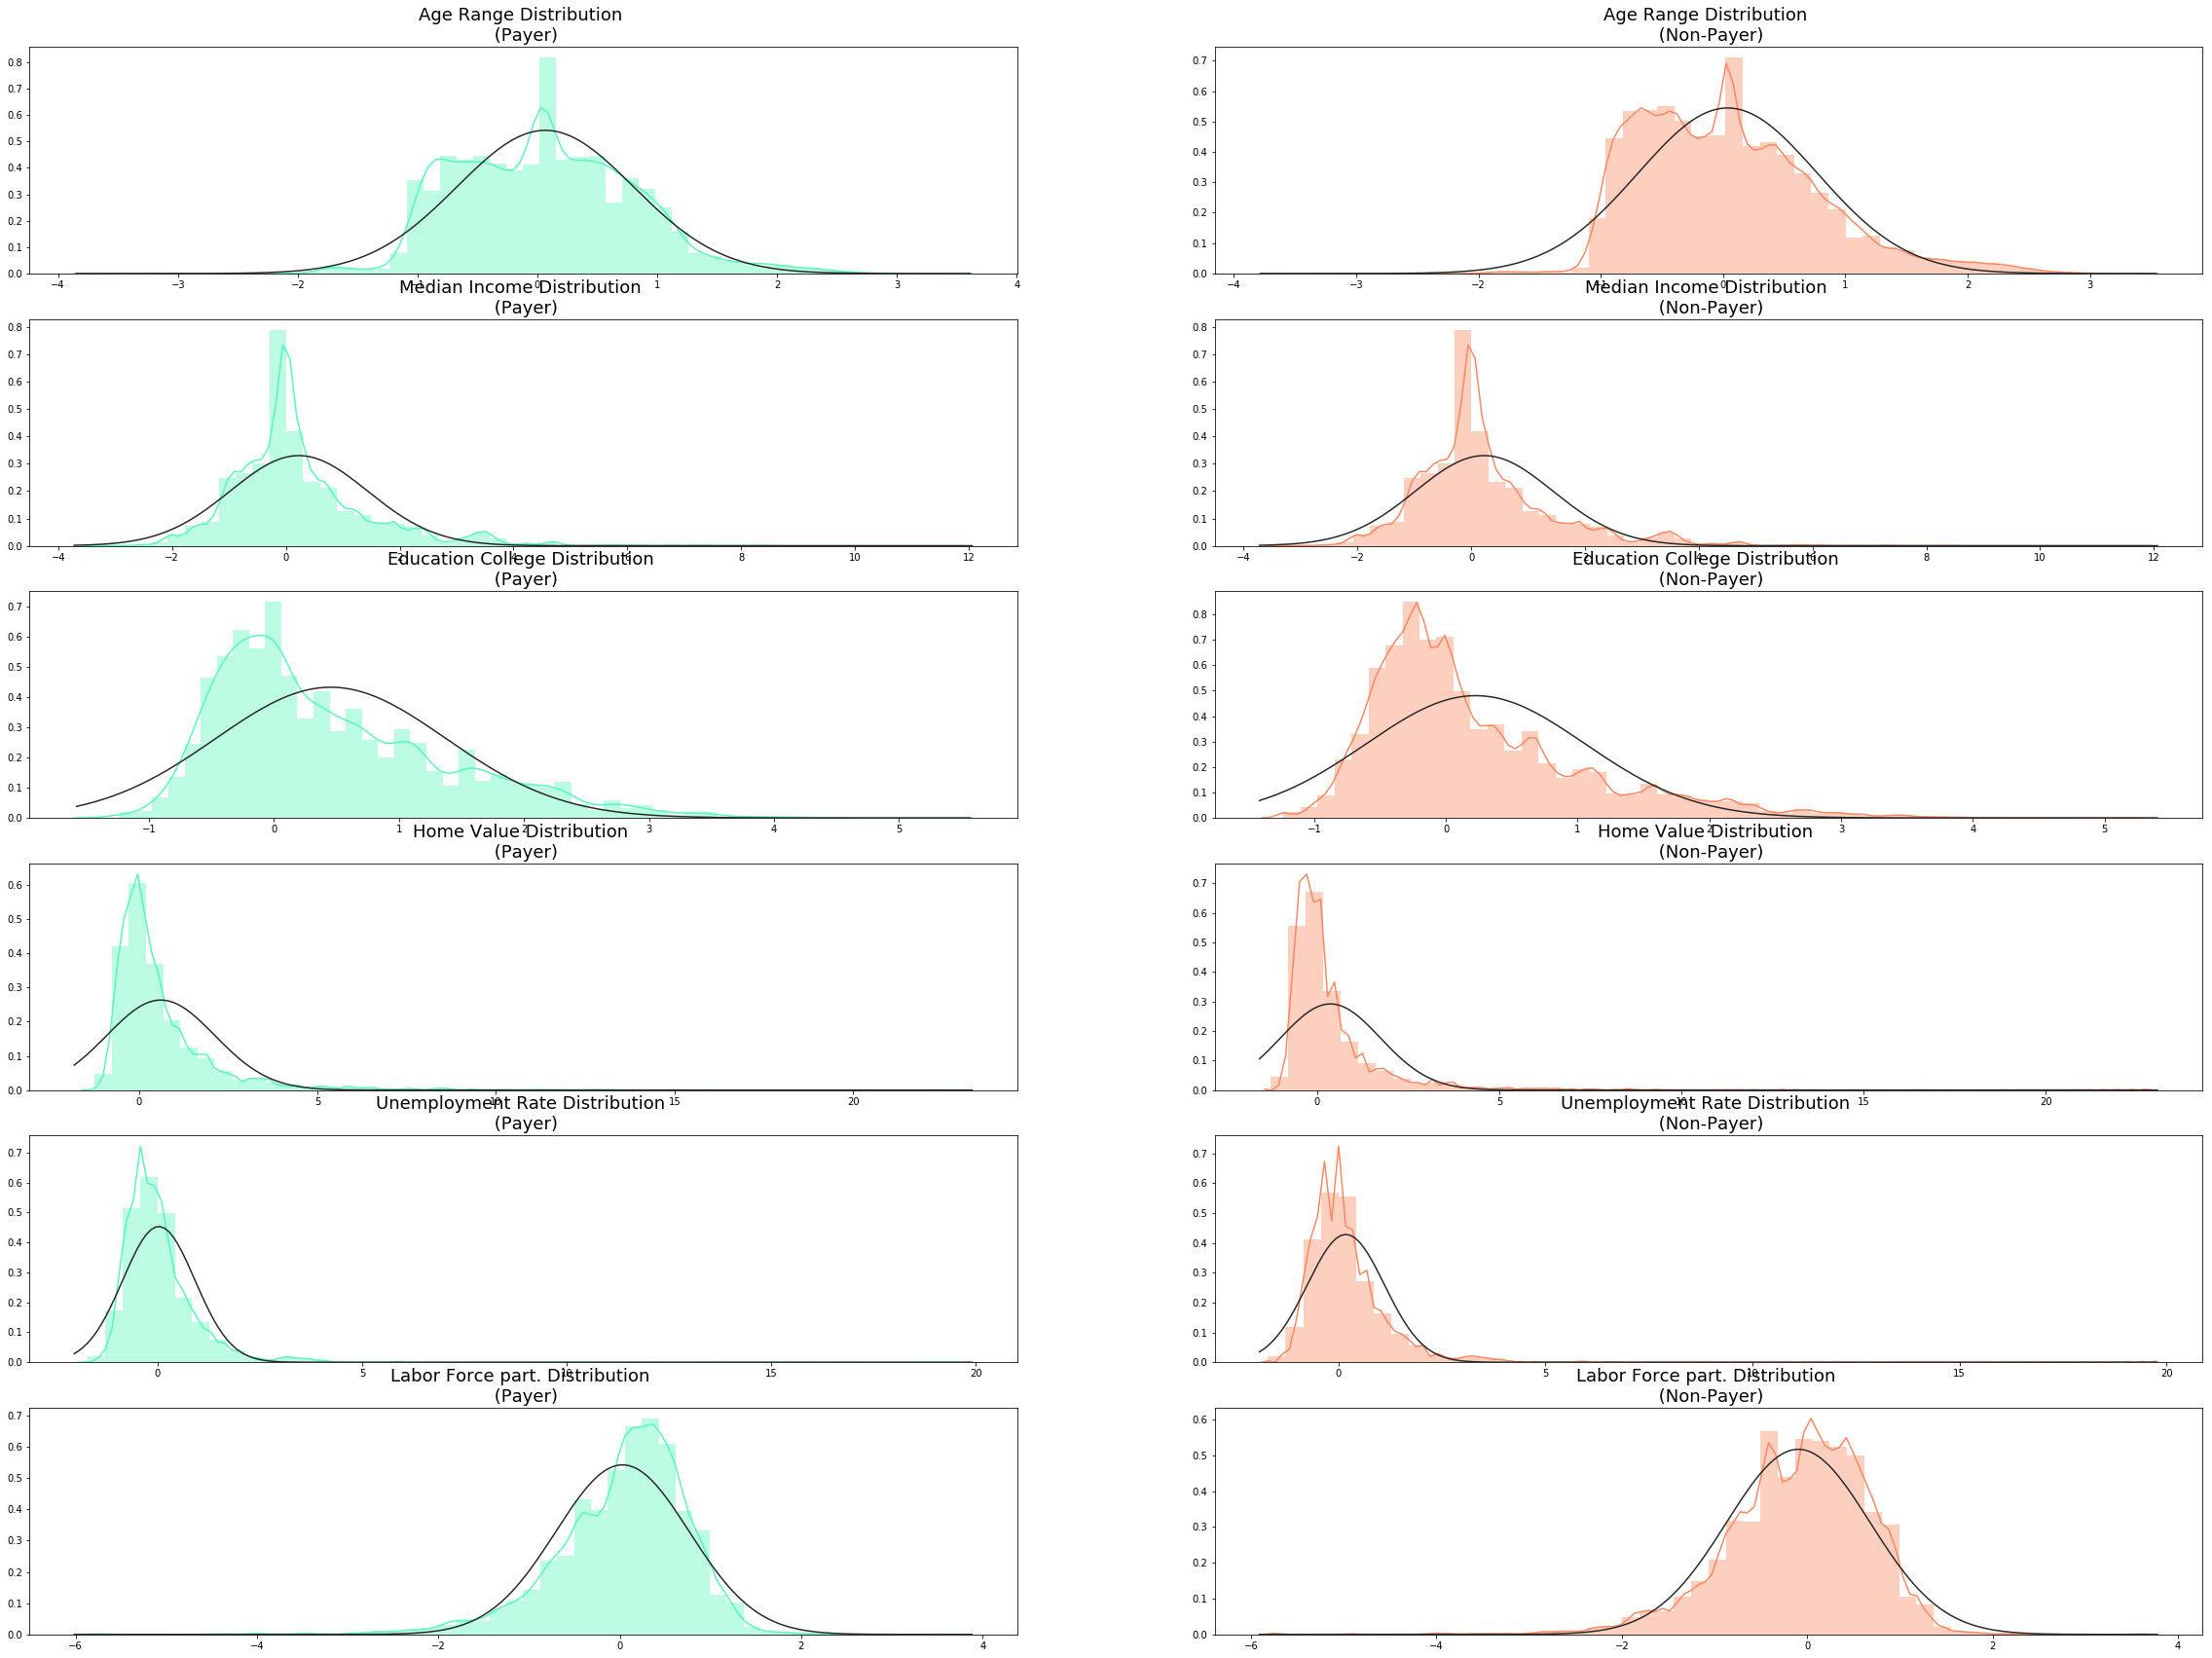

In [116]:
from scipy.stats import norm

f, ( [ax1, ax2], [ax3, ax4] , [ax5, ax6], [ax7, ax8], [ax9, ax10], [ax11, ax12] ) = plt.subplots(6, 2 , figsize=(40, 30))

#age range
scl_age_payer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_age_payer_dist,ax=ax1, fit=norm, color='#56F9BB')
ax1.set_title('Age Range Distribution \n (Payer)', fontsize=18)

scl_age_nonpayer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_age_nonpayer_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('Age Range Distribution \n (Non-Payer)', fontsize=18)

#income
scl_income_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_income_dist,ax=ax3, fit=norm, color='#56F9BB')
ax3.set_title('Median Income Distribution \n (Payer)', fontsize=18)

scl_nonincome_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_income_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('Median Income Distribution \n (Non-Payer)', fontsize=18)

#college
scl_college_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_college_dist,ax=ax5, fit=norm, color='#56F9BB')
ax5.set_title('Education College Distribution \n (Payer)', fontsize=18)

scl_noncollege_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_noncollege_dist,ax=ax6, fit=norm, color='#FB8861')
ax6.set_title('Education College Distribution \n (Non-Payer)', fontsize=18)

#home value
scl_home_dist = new_df['scl_Home_value'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_home_dist,ax=ax7, fit=norm, color='#56F9BB')
ax7.set_title('Home Value Distribution \n (Payer)', fontsize=18)

scl_nonhome_dist = new_df['scl_Home_value'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_nonhome_dist,ax=ax8, fit=norm, color='#FB8861')
ax8.set_title('Home Value Distribution \n (Non-Payer)', fontsize=18)

#unemployment rate
scl_unemply_dist = new_df['scl_Unemployment_rate'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_unemply_dist,ax=ax9, fit=norm, color='#56F9BB')
ax9.set_title('Unemployment Rate Distribution \n (Payer)', fontsize=18)

scl_nonunemply_dist = new_df['scl_Unemployment_rate'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_nonunemply_dist,ax=ax10, fit=norm, color='#FB8861')
ax10.set_title('Unemployment Rate Distribution \n (Non-Payer)', fontsize=18)


#labor participation
scl_labor_dist = new_df['scl_Labor_force_participation'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_labor_dist,ax=ax11, fit=norm, color='#56F9BB')
ax11.set_title('Labor Force part. Distribution \n (Payer)', fontsize=18)

scl_nonlabor_dist = new_df['scl_Labor_force_participation'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_nonlabor_dist,ax=ax12, fit=norm, color='#FB8861')
ax12.set_title('Labor Force part. Distribution \n (Non-Payer)', fontsize=18)

plt.show()

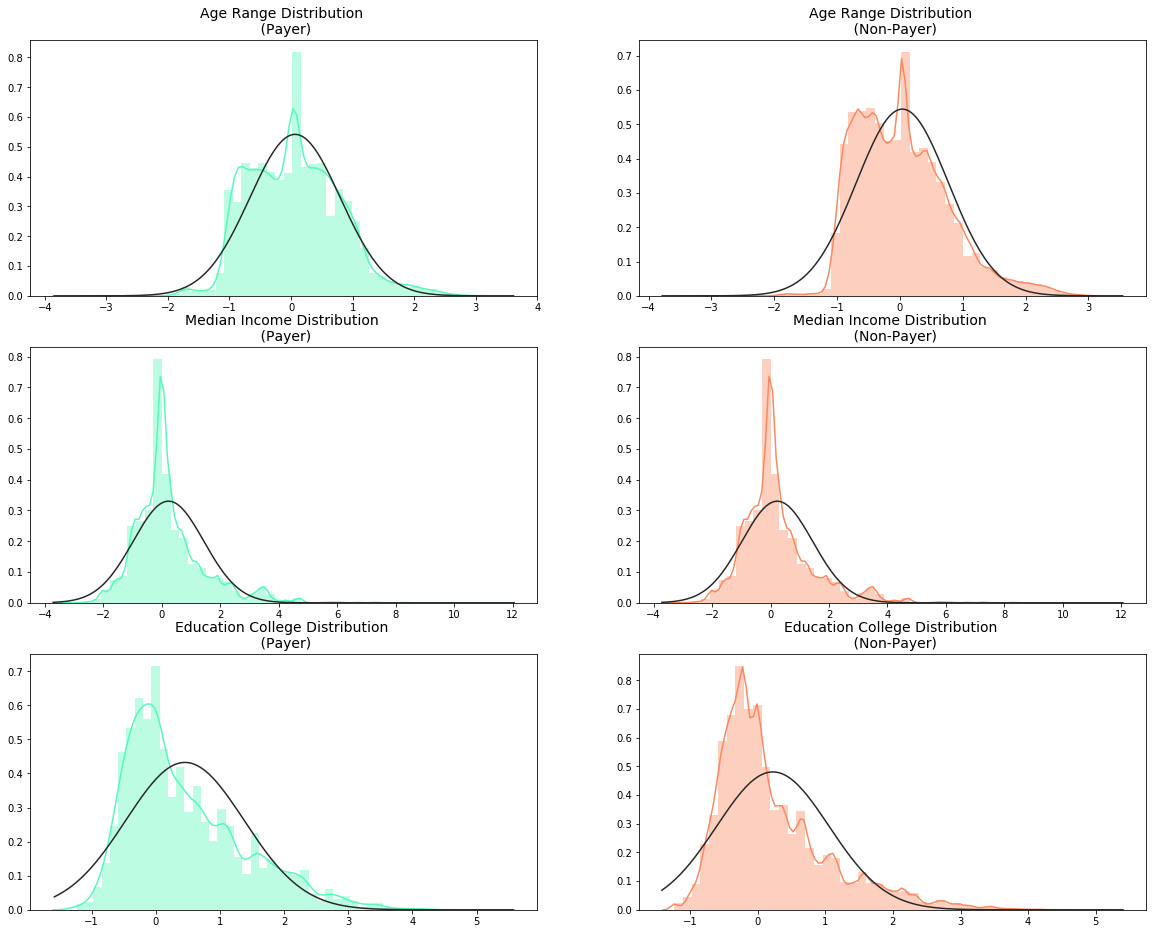

In [163]:
f, ( [ax1, ax2], [ax3, ax4] , [ax5, ax6]) = plt.subplots(3, 2 , figsize=(20, 16))

#age range
scl_age_payer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_age_payer_dist,ax=ax1, fit=norm, color='#56F9BB')
ax1.set_title('Age Range Distribution \n (Payer)', fontsize=14)

scl_age_nonpayer_dist = new_df['scl_Age'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_age_nonpayer_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('Age Range Distribution \n (Non-Payer)', fontsize=14)

#income
scl_income_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_income_dist,ax=ax3, fit=norm, color='#56F9BB')
ax3.set_title('Median Income Distribution \n (Payer)', fontsize=14)

scl_nonincome_dist = new_df['scl_Median_Household_Income'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_income_dist,ax=ax4, fit=norm, color='#FB8861')
ax4.set_title('Median Income Distribution \n (Non-Payer)', fontsize=14)

#college
scl_college_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 1].values
sns.distplot(scl_college_dist,ax=ax5, fit=norm, color='#56F9BB')
ax5.set_title('Education College Distribution \n (Payer)', fontsize=14)

scl_noncollege_dist = new_df['scl_Education_College'].loc[new_df['Paid'] == 0].values
sns.distplot(scl_noncollege_dist,ax=ax6, fit=norm, color='#FB8861')
ax6.set_title('Education College Distribution \n (Non-Payer)', fontsize=14)

plt.savefig('img_pay_non_dist.png')

plt.show()



# Dimensionality Reduction and Clustering 

**Understanding t-SNE:**

In order to understand this algorithm you have to understand the following terms: 
- Euclidean Distance
- Conditional Probability 
- Normal and T-Distribution Plots

In [121]:
small_df = data.sample(5000, random_state=52)
small_df.Paid.value_counts(normalize=True)

0    0.9316
1    0.0684
Name: Paid, dtype: float64

In [122]:
small_df.shape

(5000, 104)

In [123]:
X = small_df.drop('Paid', axis=1)
y = small_df.Paid


#t-SNE implementation
t0 = time.time()
x_reduced_tsne = TSNE(n_components=2, random_state=123).fit_transform(X.values) 
t1 = time.time()
print('t-SNE took {:.2} s'.format(t1 - t0))


# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))


# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

t-SNE took 4.5e+01 s
PCA took 0.14 s
Truncated SVD took 0.01 s


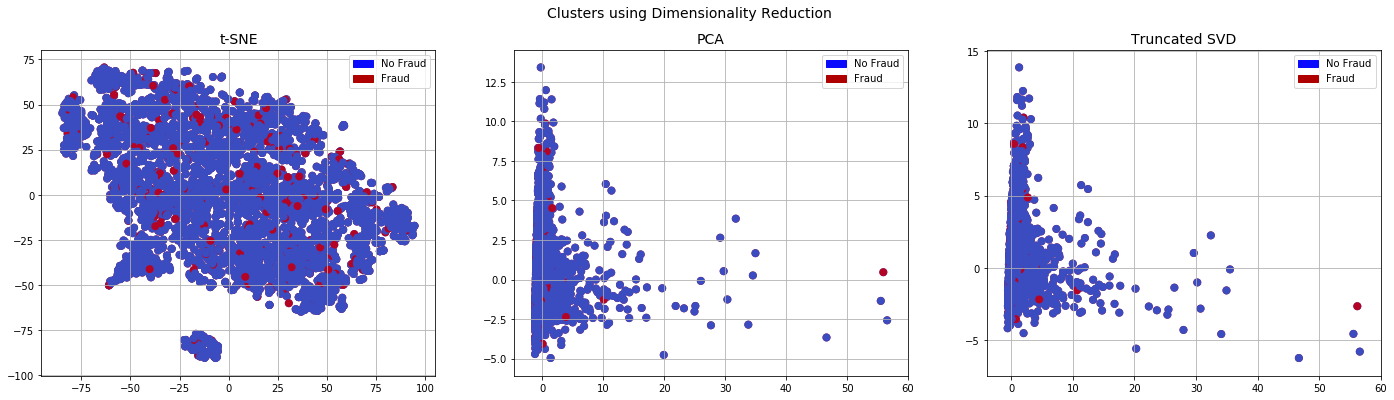

In [164]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax1.scatter(x_reduced_tsne[:,0], x_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Non-Payer', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Payer', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.savefig('img_dim_redct.png')

plt.show()

# Classifiers (UnderSampling):

In [126]:
data_split = data.reset_index()
data_split.drop('index', axis=1, inplace=True)
data_train = data_split.loc[0:49999]
data_test = data_split.loc[49999:100000]

print('Train')
print(data_train.shape)
print(data_train.Paid.value_counts(normalize=True))
print('\n')
print('Test')
print(data_test.shape)
print(data_test.Paid.value_counts(normalize=True))

Train
(50000, 104)
0    0.93724
1    0.06276
Name: Paid, dtype: float64


Test
(50002, 104)
0    0.938482
1    0.061518
Name: Paid, dtype: float64


In [127]:
subset_train = data_train.sample(5000, random_state=42)

In [128]:
X = subset_train.drop('Paid', axis=1)
y = subset_train.Paid

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [130]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [131]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [132]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 93.0 % accuracy score


In [133]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1)), "max_features":['auto'], 'n_estimators': [1, 10, 100, 200, 300]}
grid_tree = GridSearchCV(RandomForestClassifier(), forest_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [135]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.15%
Knears Neighbors Cross Validation Score 93.05%
Support Vector Classifier Cross Validation Score 93.15%
RandomForest Classifier Cross Validation Score 93.15%


In [136]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Random Forest Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py'>

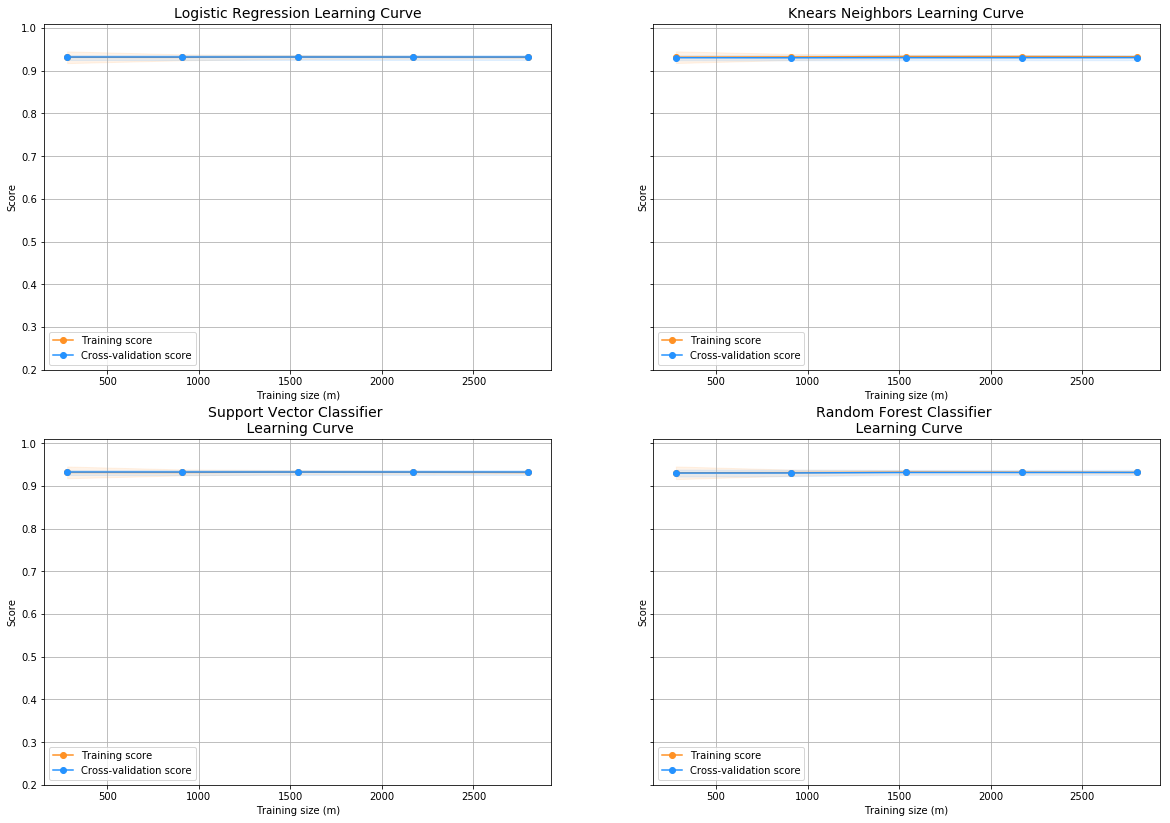

In [137]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.2, 1.01), cv=cv, n_jobs=4)

In [139]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [140]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.4984861752686782
KNears Neighbors:  0.5011538567023598
Support Vector Classifier:  0.5278776872715305
Decision Tree Classifier:  0.5


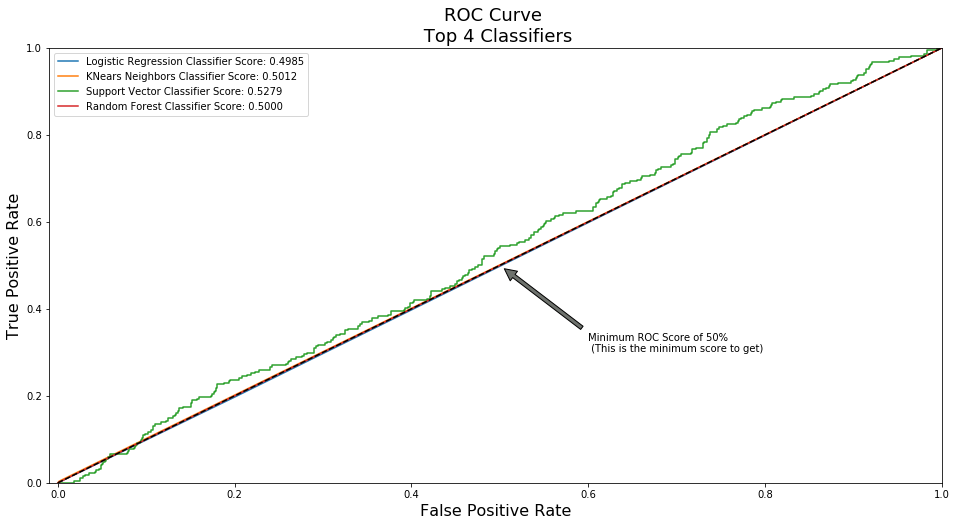

In [162]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

plt.savefig('img_ROC_curve.png')

plt.show()

### A deeper look into LogisticRegression 

Terms:
- True Positives: Correctly Classified Payers
- False Positives: Incorrectly Classified Payers
- True Negative: Correctly Classified Non-Payers
- False Negative: Incorrectly Classified Non-Payers
- Precision: True Positives/(True Positives + False Positives)
- Recall: True Positives/(True Positives + False Negatives)
- Precision as the name says, says how precise (how sure) is our model in detecting Payers while recall is the amount of Payers our model is able to detect.
- Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect.

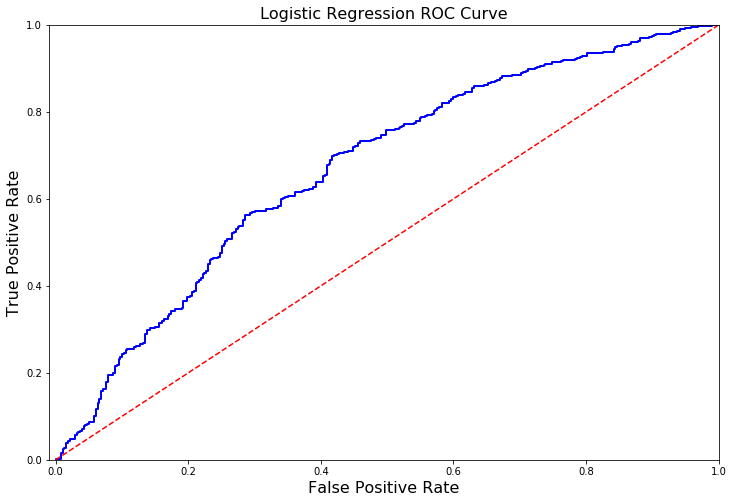

In [163]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [123]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [143]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.00
Precision Score: 0.00
F1 Score: 0.00
Accuracy Score: 0.93
---------------------------------------------------------------------------------------------------------------------------------------


In [144]:
print('Predict Results\n----------------------\n')
print('LogisticRegression:')
print(classification_report(y_test, log_reg.predict(X_test)))

print('\n')
print('RandomForest:')
print(classification_report(y_test, tree_clf.predict(X_test)))


Predict Results
----------------------

LogisticRegression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        62

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000



RandomForest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        62

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000



In [211]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train);

rf_imp = rf.feature_importances_


In [212]:
# rf_list = []

# for name, importance in zip(features, 100*(rf_imp/ rf_imp.max())):
#     print(name, '=', importance)
#     rf_list.append(importance)

[-0.25246934 -0.13407821 -0.35702956 -0.33766237 -0.14785474 -0.17460178
  1.22222222  0.31132075  0.02608696 -0.17977528 -0.34586483  1.44444444
  0.          0.          0.          0.          0.          0.
  1.         -1.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.     

# SMOTE Technique (over-sampling) 

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
- Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
- Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.


In [160]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()



rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 400000 | Length of y (train): 400000
Length of X (test): 100000 | Length of y (test): 100000


KeyboardInterrupt: 

In [ ]:
labels = ['Non-Payers', 'Payers']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

In [166]:
y_score = best_est.decision_function(original_Xtest)

In [169]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.66


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.66')

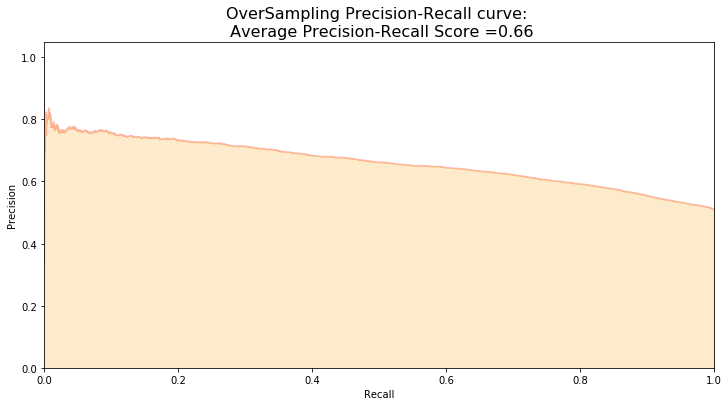

In [170]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [171]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

In [172]:
# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.38439130783081055 sec


# Test Data with LogisticRegression: 

**Confusion Matrix:**
- Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.
- True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class. 
- False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class. 
- False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class 
- True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

**Summary:**

Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)

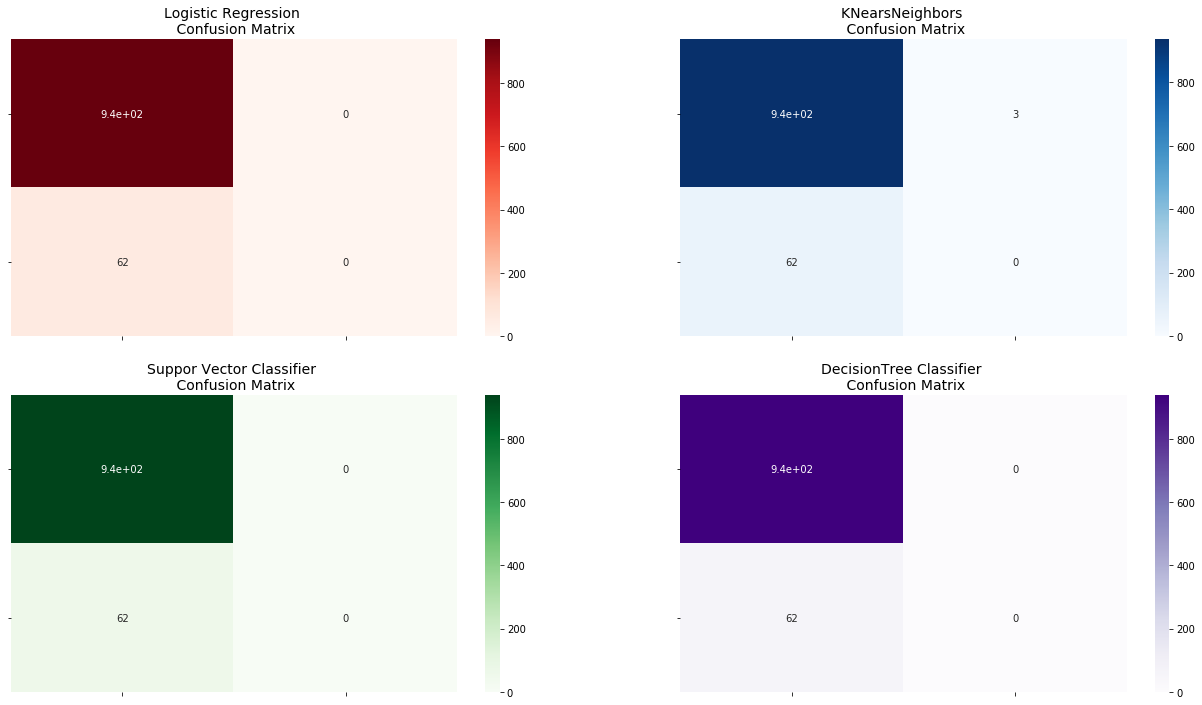

In [165]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.Reds)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.Blues)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.Greens)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.Purples)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.savefig('img_conf_mtrx_models.png')

plt.show()

In [159]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        62

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        62

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted avg       0.88      0.94      0.91      1000

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       938
           1       0.00      0.00      0.00        62

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.47      0.50      0.48      1000
weighted

In [175]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

final_df

,Technique,Score
0,Random UnderSampling,0.620000
1,Oversampling (SMOTE),0.629331


# Neural Networks 

In this section we will implement a simple Neural Network in order to see which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting payers and non-payers.

In [150]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(50, activation='relu'),
    Dense(2, activation='sigmoid')
])

Using TensorFlow backend.


In [182]:
undersample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 92)                8556      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2976      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                1650      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 13,284
Trainable params: 13,284
Non-trainable params: 0
_________________________________________________________________


In [151]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [152]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=100, epochs=30, shuffle=True, verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/30
 - 1s - loss: 0.4830 - acc: 0.7944 - val_loss: 0.2124 - val_acc: 0.9475
Epoch 2/30
 - 0s - loss: 0.2620 - acc: 0.9275 - val_loss: 0.2087 - val_acc: 0.9475
Epoch 3/30
 - 0s - loss: 0.2541 - acc: 0.9275 - val_loss: 0.2036 - val_acc: 0.9475
Epoch 4/30
 - 0s - loss: 0.2506 - acc: 0.9275 - val_loss: 0.2047 - val_acc: 0.9475
Epoch 5/30
 - 0s - loss: 0.2473 - acc: 0.9275 - val_loss: 0.2062 - val_acc: 0.9475
Epoch 6/30
 - 0s - loss: 0.2449 - acc: 0.9275 - val_loss: 0.2121 - val_acc: 0.9475
Epoch 7/30
 - 0s - loss: 0.2425 - acc: 0.9275 - val_loss: 0.2072 - val_acc: 0.9475
Epoch 8/30
 - 0s - loss: 0.2398 - acc: 0.9275 - val_loss: 0.2117 - val_acc: 0.9475
Epoch 9/30
 - 0s - loss: 0.2353 - acc: 0.9275 - val_loss: 0.2135 - val_acc: 0.9475
Epoch 10/30
 - 0s - loss: 0.2307 - acc: 0.9275 - val_loss: 0.2147 - val_acc: 0.9475
Epoch 11/30
 - 0s - loss: 0.2250 - acc: 0.9275 - val_loss: 0.2101 - val_acc: 0.9475
Epoch 12/30
 - 0s - loss: 0.2182 - acc

In [153]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [154]:
undersample_payer_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

In [155]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[88356  5319]
 [ 5759   566]]
Confusion matrix, without normalization
[[93675     0]
 [    0  6325]]


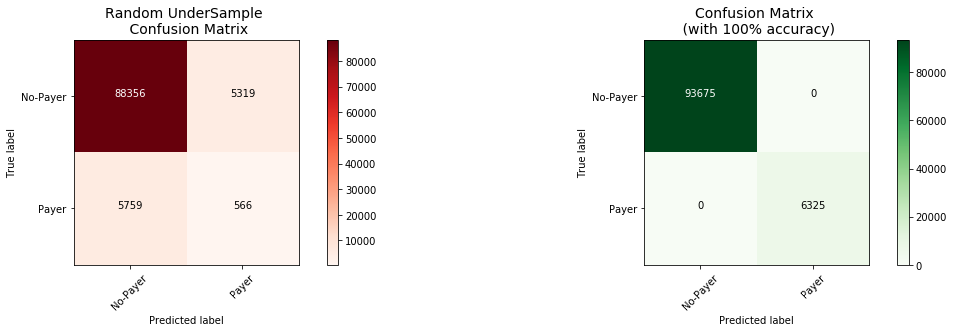

In [166]:
undersample_cm = confusion_matrix(original_ytest, undersample_payer_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No-Payer', 'Payer']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

plt.savefig('img_neural_mtrx.png')

plt.show()

# EDA Part III
___

In [190]:
paid = df[(df.Closure_Type == 'PIF') | (df.Closure_Type =='SETTLE')] 

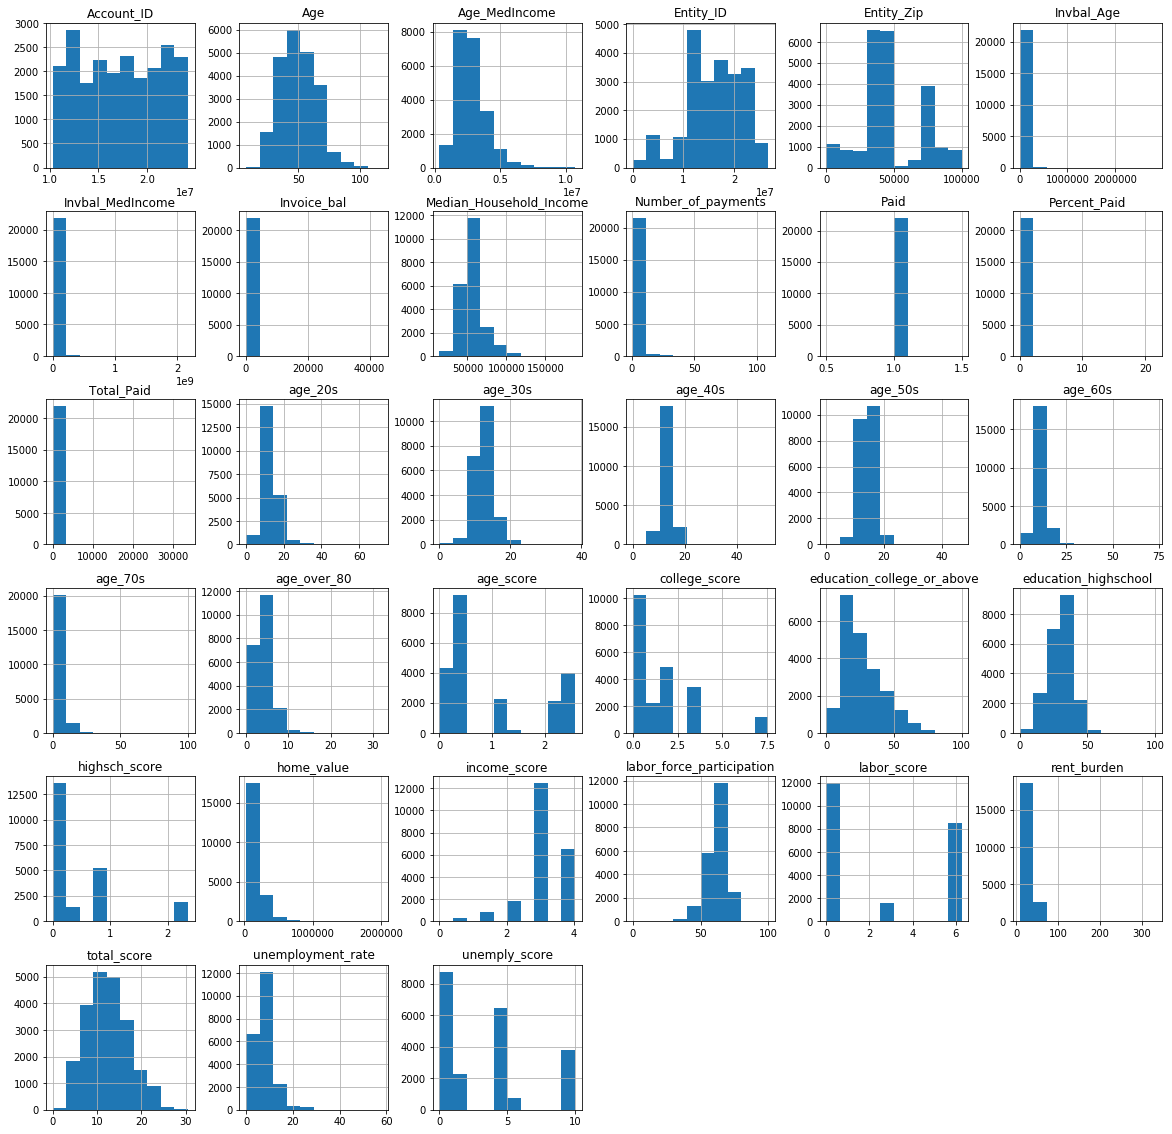

In [199]:
paid.hist(figsize=(20,20));

In [221]:
df.Grade.value_counts()

Aaa    89373
Bbb    83182
C      81204
B      68974
Cc     58372
Bb     41832
D      22731
Aa     22637
Dd     18662
F      11805
A       1228
Name: Grade, dtype: int64